In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [2]:
print(boston.keys())
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

In [3]:
import pandas as pd
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


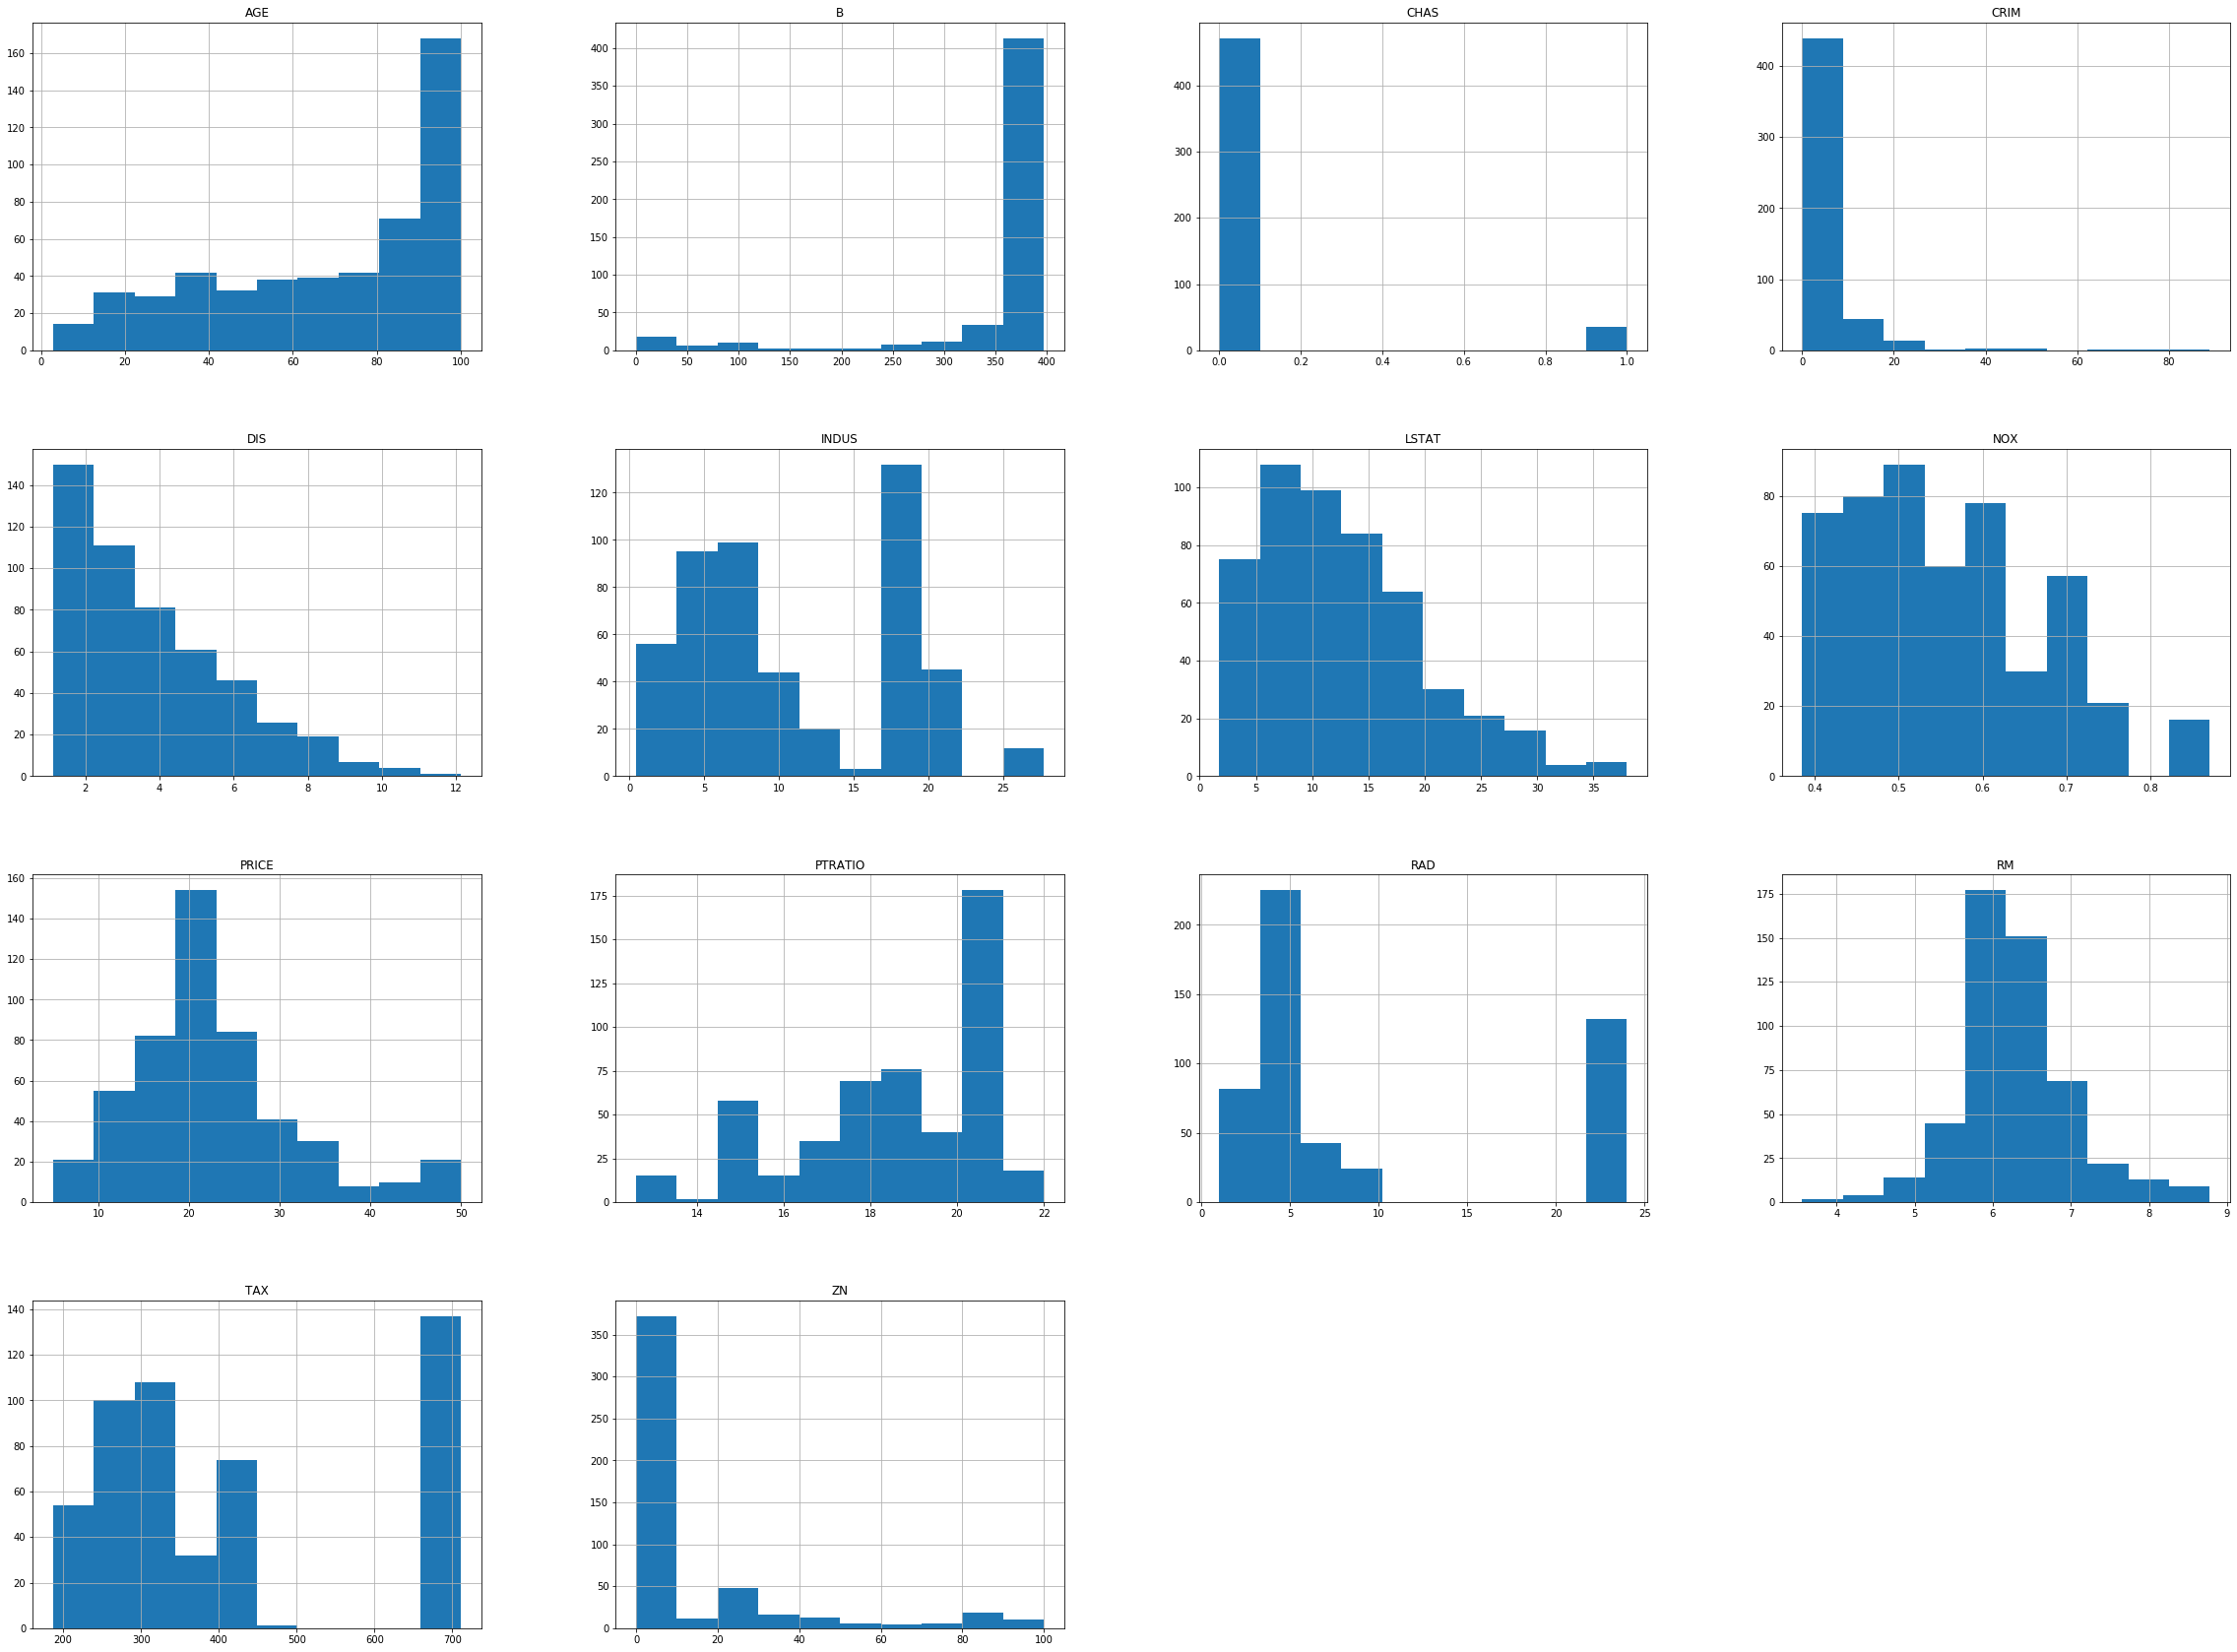

In [5]:
hist = bos.hist(figsize=(40, 30))

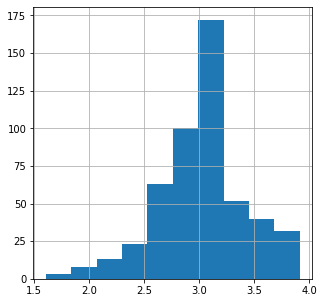

In [9]:
import numpy as np
log_price = np.log(bos['PRICE'])
log_price.hist(figsize=(5, 5))

In [10]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Correlations of prices with different features:
LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
PRICE      1.000000
Name: PRICE, dtype: float64


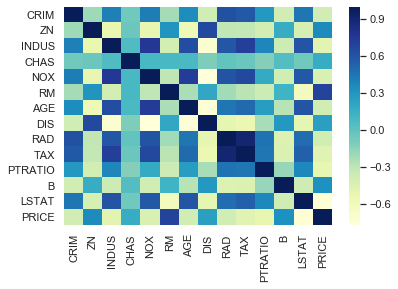

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

# correlation matrix of the features
X = bos.drop(['PRICE'], axis=1)
Y = bos['PRICE']
corr_matrix = bos.corr()
print('Correlations of prices with different features:')
print(corr_matrix['PRICE'].sort_values())

# it is surprising that RAD is strongly correlated with TAX
# Draw the heatmap 
rc={'axes.labelsize': 32, 'font.size': 32, 'legend.fontsize': 32.0} # set font size
sns.set(rc=rc)
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, cmap="YlGnBu")

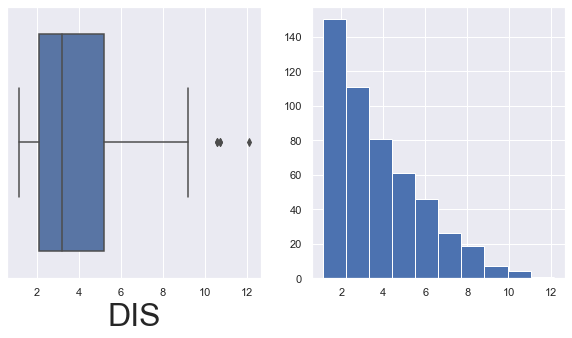

In [12]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x=bos['DIS'])

plt.subplot(1, 2, 2)
bos['DIS'].hist(figsize=(10, 5))

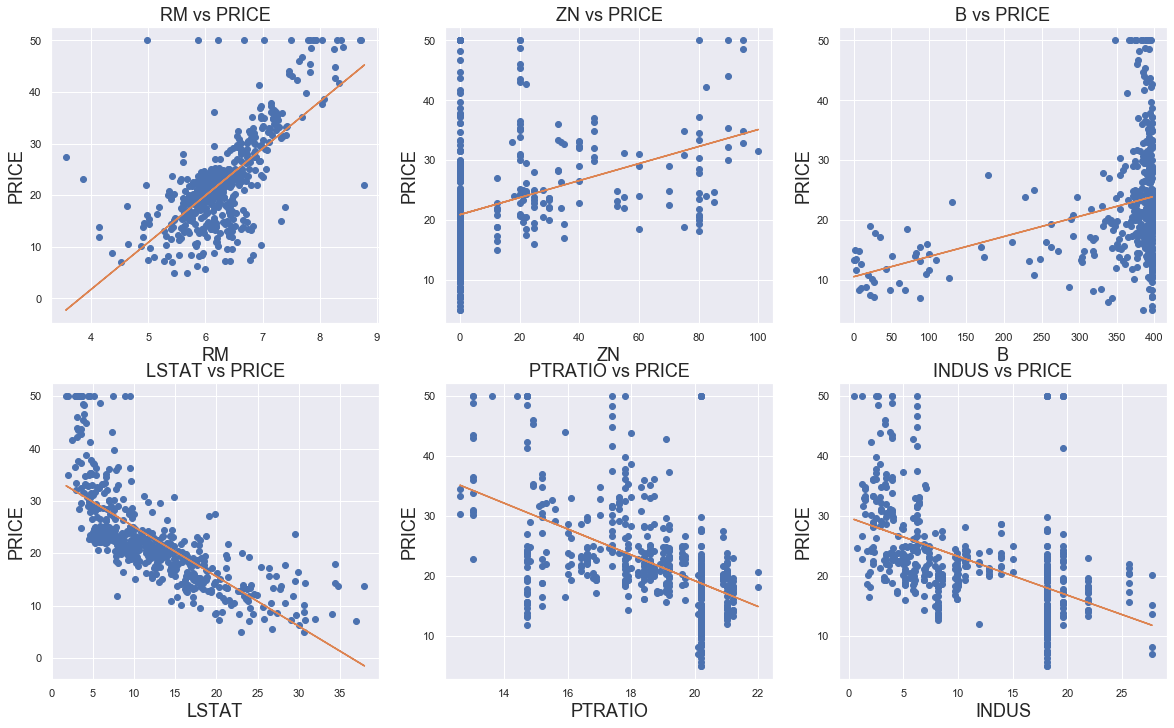

In [13]:
plt.figure(figsize=(20, 12))

y = bos['PRICE']
col = ['RM', 'ZN', 'B', 'LSTAT', 'PTRATIO', 'INDUS']
i = 0
while i < len(col):
    plt.subplot(2, 3, i+1)
    x = bos[col[i]]
    plt.plot(x, y, 'o')
    # Create regression line
    #plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
    plt.title(col[i] + ' vs PRICE', fontsize=18)
    plt.xlabel(col[i], fontsize=18)
    plt.ylabel('PRICE', fontsize=18)
    i += 1
    
#colors = (0,0,1) # marker color
#area = np.pi**2 # marker size
#plt.scatter(Y_test, Y_pred, s=area, c=colors, alpha=1)    

In [14]:
from scipy import stats
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

X = bos.drop(['PRICE'], axis=1)
Y = bos['PRICE']

seed = 0 # seed used for random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)
# bos_train, bos_test = train_test_split(bos, test_size = 0.2, random_state = 0)

In [15]:
# print RMSE and r2 score
# plot prediction vs actual prices
def show_result(regressor, X_train, Y_train, X_test, Y_test, plot_pred=False, plot_train=False):
    regressor.fit(X_train, Y_train)  
    Y_pred = regressor.predict(X_test)
    Y_train_pred = regressor.predict(X_train)
    mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
    score = r2_score(Y_test, Y_pred) # explained variance
    print('Testing RMSE is: ', np.sqrt(mse))
    print('Testing r2 score is: ', score)
    # scores = cross_val_score(regr, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)
    # print('Cross-validation RMSE scores: ', np.sqrt(-scores))
    # print('Average Cross-validation scores: ', np.mean(np.sqrt(-scores)))
    # print('Std deviation of Cross-validation RMSE scores: ', np.sqrt(-scores).std())
    mse_train = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
    score_train = r2_score(Y_train, Y_train_pred) # explained variance
    print('Training RMSE is: ', np.sqrt(mse_train))
    print('Training r2 score is: ', score_train)
    
    if plot_pred == True:
        plt.scatter(Y_test, Y_pred)
        plt.xlabel("Y_test", fontsize=16) 
        plt.ylabel("Y_pred", fontsize=16)
        plt.title(regressor)
        plt.show()
    if plot_train == True:
        plt.scatter(Y_train, Y_train_pred)
        plt.xlabel("Y_train", fontsize=16) 
        plt.ylabel("Y_train_pred", fontsize=16)
        plt.title(regressor)
        plt.show()
    return

Testing RMSE is:  5.783509315085134
Testing r2 score is:  0.589222384918251
Training RMSE is:  4.396188144698282
Training r2 score is:  0.7730135569264234


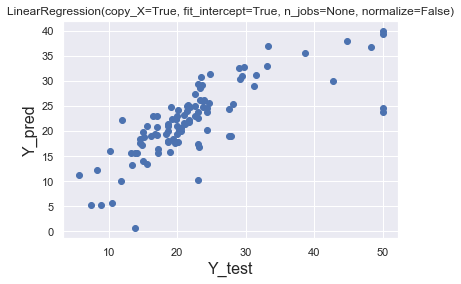

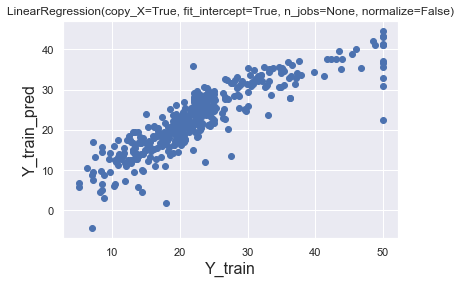

Coefficients of linear regression: [('NOX', -16.123604315429574), ('DIS', -1.3863973702786787), ('PTRATIO', -1.0459211887459732), ('LSTAT', -0.4927927245047151), ('CRIM', -0.11944344700245477), ('TAX', -0.010989636563079828), ('AGE', -0.003121081780738411), ('INDUS', 0.005485261681774645), ('B', 0.008110106932704137), ('ZN', 0.04477995106651027), ('RAD', 0.24417832698880484), ('CHAS', 2.34080360624208), ('RM', 3.708709012219148)]
Intercept of linear regression: 38.09169492630278


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
Y_train_pred = lr.predict(X_train)

show_result(lr, X_train, Y_train, X_test, Y_test, plot_pred=True, plot_train=True)

# print coefficients of linear regression
a = X_train.columns.tolist()
b = lr.coef_
dic = dict(zip(a, b))
d = sorted(dic.items(), key=lambda x: x[1])
print('Coefficients of linear regression:', d)
print('Intercept of linear regression:', lr.intercept_)



(415, 14)
(332, 13)
(83, 13)
Testing RMSE is:  3.270879315851162
Testing r2 score is:  0.7755648039580256
Training RMSE is:  4.265915912065592
Training r2 score is:  0.7378375110401474


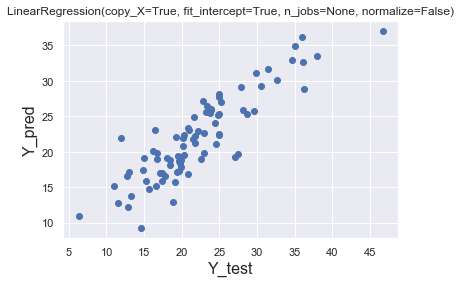

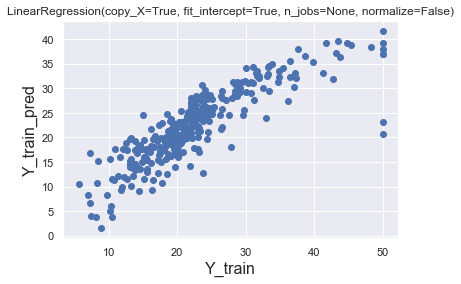

In [17]:
# remove outliers where zscore of any feature is >= threshold
z = np.abs(stats.zscore(bos))  # default axis=0 (column-wise z-scores)
threshold = 3 

bos_o = bos[(z < threshold).all(axis=1)] #.all(axis=1) checks if row_wise values all meet condition
print(bos_o.shape)
X_o = bos_o.drop(['PRICE'], axis=1)
Y_o = bos_o['PRICE']
X_train_o, X_test_o, Y_train_o, Y_test_o = train_test_split(X_o, Y_o, test_size = 0.2, random_state = seed)
print(X_train_o.shape)
print(X_test_o.shape)

# linear regression after removing outliers
lr = LinearRegression()
lr.fit(X_train_o, Y_train_o)

Y_pred_o = lr.predict(X_test_o)
Y_train_pred_o = lr.predict(X_train_o)

show_result(lr, X_train_o, Y_train_o, X_test_o, Y_test_o, plot_pred=True, plot_train=True)

Testing RMSE is:  5.0681987803747335
Testing r2 score is:  0.46114836690216987
Training RMSE is:  5.530199506657593
Training r2 score is:  0.5594171695087051


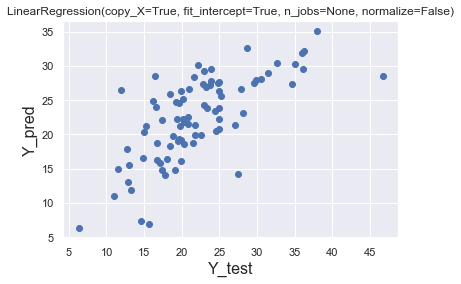

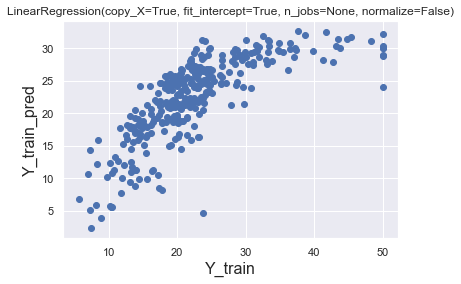

In [18]:
# applying PCA before linear regression does not seem to help (outliers removed)
from sklearn.decomposition import PCA

n = 6
pca = PCA(n_components=n)
pca.fit(X_train_o)  
X_train_PCA = pca.fit_transform(X_train_o)

#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  

lr.fit(X_train_PCA, Y_train_o)
X_test_PCA = pca.fit_transform(X_test_o) 
Y_pred_PCA = lr.predict(X_test_PCA)
Y_train_pred_PCA = lr.predict(X_train_PCA)

show_result(lr, X_train_PCA, Y_train_o, X_test_PCA, Y_test_o, plot_pred=True, plot_train=True)

In [19]:
# applying logarithmic to target values before applying linear regression helps a little bit
Y_train_log = np.log(Y_train)

lr.fit(X_train, Y_train_log)

Y_pred_log = lr.predict(X_test)
Y_train_pred_log = lr.predict(X_train)

Y_pred = np.exp(Y_pred_log)
Y_train_pred = np.exp(Y_train_pred_log)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print('RMSE is: ', np.sqrt(mse))
print('r2 score is: ', score)

mse_train = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
score_train = r2_score(Y_train, Y_train_pred) # explained variance
print('Training RMSE is: ', np.sqrt(mse_train))
print('Training r2 score is: ', score_train)

#plt.scatter(Y_test, Y_pred)
#plt.xlabel("Y_test", fontsize=18)
#plt.ylabel("Y_pred", fontsize=18)
#plt.show()

# show_result(lr, X_train, Y_train_log, X_test, Y_test_log, plot_pred=True, plot_train=True)

RMSE is:  5.7560715577736
r2 score is:  0.5931107097236132
Training RMSE is:  3.972559460561207
Training r2 score is:  0.8146518777160823


Testing RMSE is:  5.597327415281274
Testing r2 score is:  0.6152440774402756
Training RMSE is:  3.6847589675368186
Training r2 score is:  0.8405349377123602


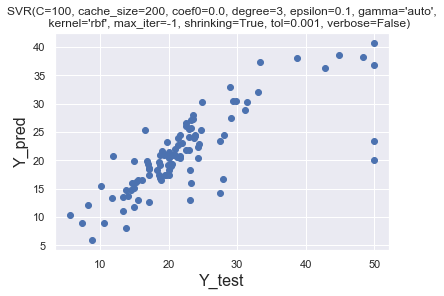

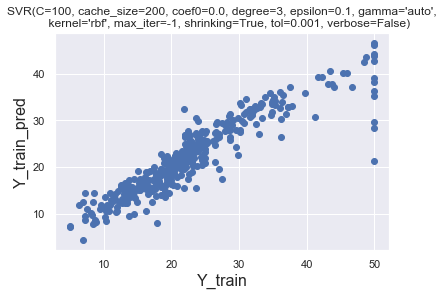

Testing RMSE is:  6.216340225942319
Testing r2 score is:  0.5254374730762857
Training RMSE is:  4.606248127177807
Training r2 score is:  0.7508034444180762


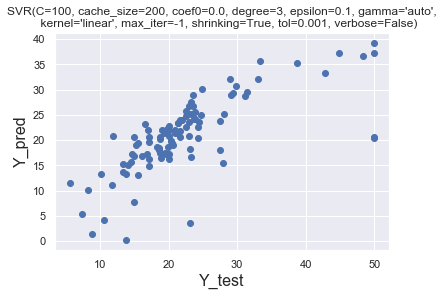

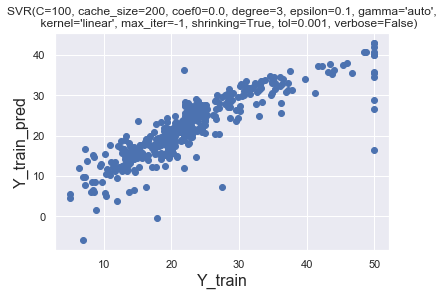

In [32]:
# SVM works well on training set but does not generalize well
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = seed)

# smaller value of C implies more regularization. if model is underfitting, try increasing C
# if model is underfitting, try increasing gamma
# epsilon: width of the street, epsilon-insensitive
clf_rbf = svm.SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

clf_lin = svm.SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


# scores = cross_val_score(clf, X_train, Y_train, cv=10)
# print('Cross-validation scores: ', scores)

show_result(clf_rbf, X_train_scaled, Y_train, X_test_scaled, Y_test, plot_pred=True, plot_train=True)
show_result(clf_lin, X_train_scaled, Y_train, X_test_scaled, Y_test, plot_pred=True, plot_train=True)

Testing RMSE is:  5.5006867065378975
Testing r2 score is:  0.6284153964871912
Training RMSE is:  2.4286100669237003
Training r2 score is:  0.9307271652955715


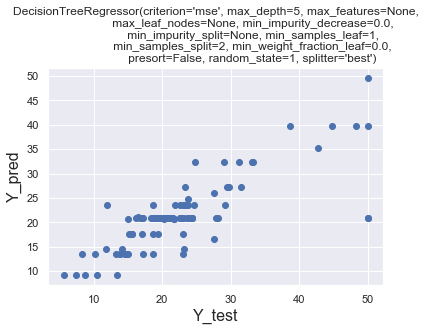

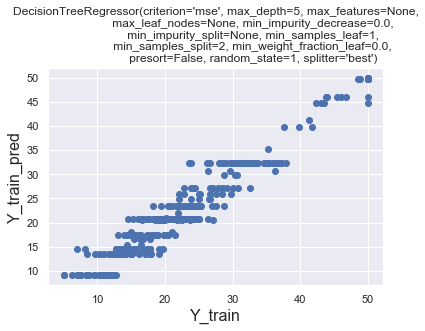

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=1, max_depth=5)
reg_tree.fit(X_train, Y_train)
Y_pred = reg_tree.predict(X_test)

#scores = cross_val_score(reg_tree, X_train, Y_train, cv=10)
#print('Cross-validation scores: ', scores)

show_result(reg_tree, X_train, Y_train, X_test, Y_test, plot_pred=True, plot_train=True)

Testing RMSE is:  4.454774713174044
Testing r2 score is:  0.7562888595954868
Training RMSE is:  2.098920049543906
Training r2 score is:  0.9482584815085273


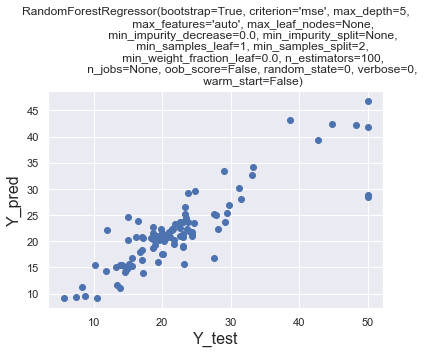

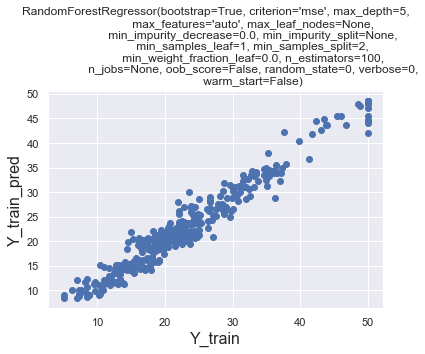

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0, max_depth=5,
                              n_estimators=100)

show_result(regr, X_train, Y_train, X_test, Y_test, plot_pred=True, plot_train=True)


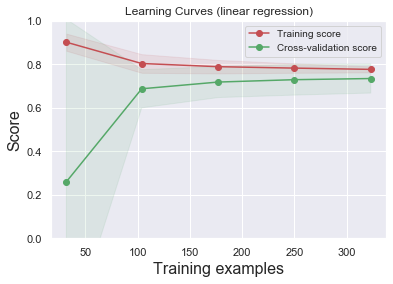

<module 'matplotlib.pyplot' from '/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [23]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from plot_learning_curves import plot_learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize = 16)
    plt.ylabel("Score", fontsize = 16)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best", prop={'size': 10})
    plt.grid(True)
    plt.show()
    return plt

title = "Learning Curves (linear regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(lr, title, X_train, Y_train, (0, 1), cv=cv, n_jobs=4)


# linear regression is underfitting

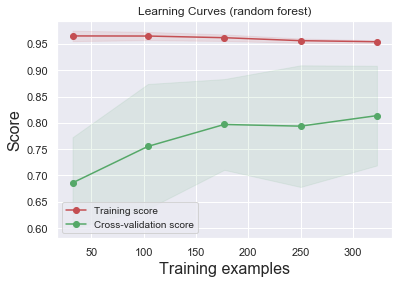

<module 'matplotlib.pyplot' from '/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [24]:
title = "Learning Curves (random forest)"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
regr = RandomForestRegressor(random_state=0, max_depth=5,
                              n_estimators=100)
plot_learning_curve(regr, title, X_train, Y_train, cv=cv, n_jobs=4)

# random forest is overfitting

Linear Kernel Normalized Fit Time: 0.01695108413696289 s
RBF Kernel Normalized Fit Time: 0.010869979858398438 s


/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


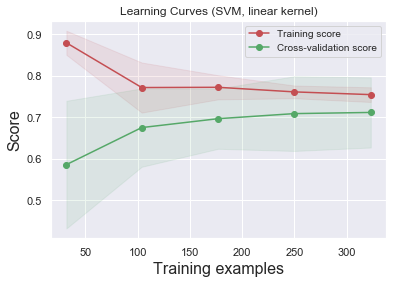

<module 'matplotlib.pyplot' from '/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [25]:
from sklearn.preprocessing import MinMaxScaler
from time import time

clf_lin = svm.SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
clf_rbf = svm.SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = seed)

start = time()
clf_lin.fit(X_train_scaled, Y_train)
print("Linear Kernel Normalized Fit Time: {} s".format(time() - start))
start = time()
clf_rbf.fit(X_train_scaled, Y_train)
print("RBF Kernel Normalized Fit Time: {} s".format(time() - start))

title = "Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_lin, title, X_train_scaled, Y_train, cv=cv, n_jobs=4)

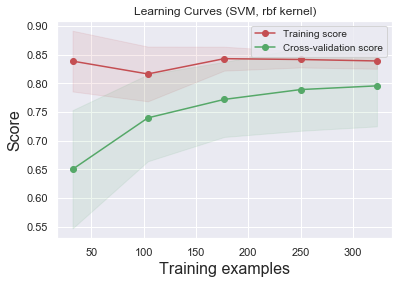

<module 'matplotlib.pyplot' from '/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [26]:
title = "Learning Curves (SVM, rbf kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(clf_rbf, title, X_train_scaled, Y_train, cv=cv, n_jobs=4)

In [27]:
from sklearn.model_selection import validation_curve

def plot_complexity_curve(estimator, title, X, y, param_name, para_range, 
                          ylim=None, cv=None, n_jobs=None):
    if ylim is not None:
        plt.ylim(*ylim)
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring="r2", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print(train_scores_mean)
    print(test_scores_mean)
    plt.title(title)
    plt.xlabel(param_name, fontsize = 16)
    plt.ylabel("Score", fontsize = 16)
    plt.ylim(0.0, 1.1)
    lw = 2
    #plt.semilogx(param_range, train_scores_mean, label="Training score",
             #color="r", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r", lw=lw)
    #plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 #color="g", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="g", lw=lw)
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best", prop={'size': 10})
    
    return plt
    

[0.61644532 0.89352303 0.95225422 0.97322559 0.98011334]
[0.56444171 0.80659455 0.84384845 0.85324773 0.85465061]


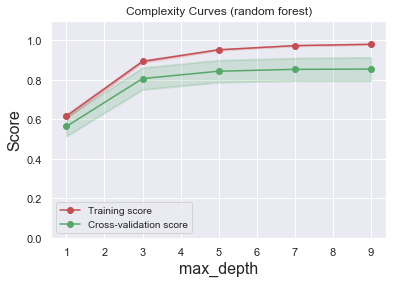

In [28]:
title = "Complexity Curves (random forest)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
param_range = range(1, 10, 2)
#estimator = SVC(gamma=0.001)
regr = RandomForestRegressor(random_state=0,
                              n_estimators=100)
plot_complexity_curve(regr, title, X_train, Y_train, 'max_depth', param_range, cv=cv, n_jobs=4)

plt.show()

[0.66906103 0.75192949 0.75172155 0.75153061 0.75138896]
[0.66138385 0.74265571 0.73921228 0.73884816 0.73878051]


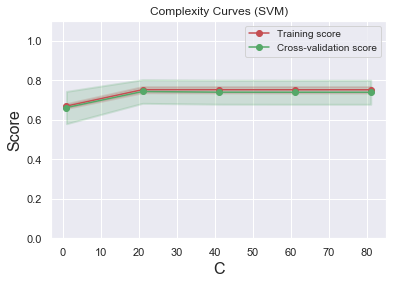

In [33]:
title = "Complexity Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
param_range = range(1, 100, 20)
#estimator = SVC(gamma=0.001)

plot_complexity_curve(clf_lin, title, X_train_scaled, Y_train, 'C', param_range, ylim=(0.5, 0.85), cv=cv, n_jobs=4)

plt.show()

/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tc/anaconda3/envs/keras/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tc/anaconda3/envs/keras/

[0.40364333 0.76428495 0.79741311 0.81443886 0.82602626]
[0.39882568 0.74906804 0.7801836  0.79623438 0.80658467]


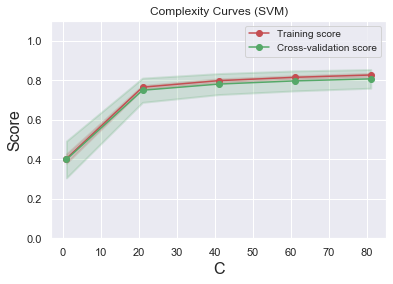

In [31]:
title = "Complexity Curves (SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
param_range = range(1, 100, 20)
#estimator = SVC(gamma=0.001)

plot_complexity_curve(clf_rbf, title, X_train_scaled, Y_train, 'C', param_range, cv=cv, n_jobs=4)

plt.show()